# Linear Regression Practice

Adapted from http://www.ritchieng.com/machine-learning-linear-regression/

## 1. Reading Data using Panda

In [2]:
# conventional way to import pandas
import pandas as pd

In [3]:
# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv('Advertising.csv', index_col=0)

# display the first 5 rows
#data.head()
data['TV'].head()

1    230.1
2     44.5
3     17.2
4    151.5
5    180.8
Name: TV, dtype: float64

In [4]:
# display the last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

What are the features?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper
What is the response?

- **Sales**: sales of a single product in a given market (in thousands of items)

What else do we know?

Because the response variable is continuous, this is a **regression problem**.
There are 200 observations (represented by the rows), and each observation is a single market.


## 2. Visualizing Data

- Seaborn: Python library for statistical data visualization built on top of Matplotlib
- Anaconda users: run conda install seaborn from the command line

In [6]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

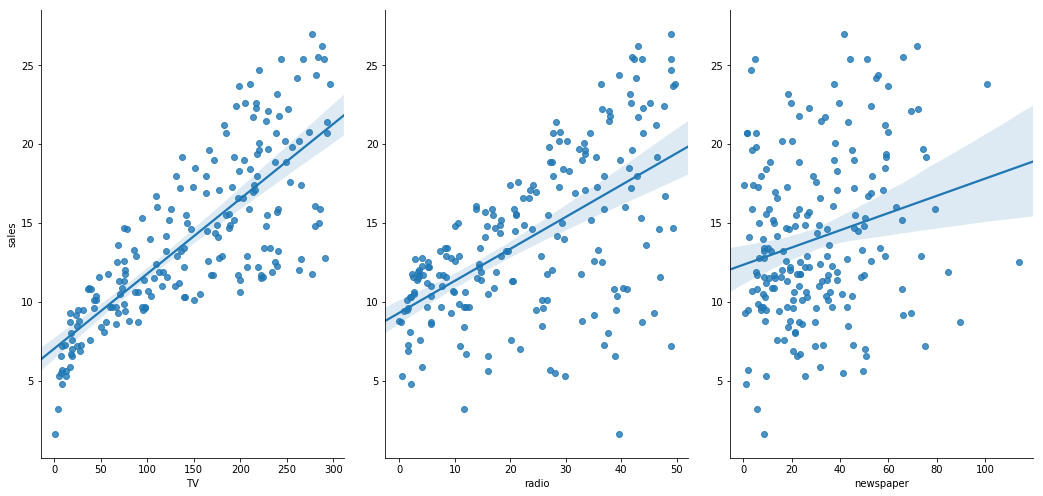

In [7]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

Linear regression
- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales

## 3. Computing Linear Regression (Scikit-learn)

## Form of linear regression
$$y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
- $y$  is the response
- $\theta_0$  is the intercept
- In this case:
$$y=\theta_0+\theta_1\times TV+\theta_2\times Radio+\theta_3 \times Newspaper$$


scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
However, pandas is built on top of NumPy
Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [8]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = pd.DataFrame(data, columns=feature_cols) 

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'radio', 'newspaper']]
# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [10]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
#y = data.Sales (python 2)

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## Splitting X and y into training and testing sets

In [11]:
# import  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Linear Regression

In [13]:
# import model
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import linalg as LA
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

## Excercise 1 
# Try your own linear regression algorithm 
alpha = 0.1
error = 1

theta = np.array([0.1, 0.1, 0.1, 0.1])
I = np.ones((X_train.shape[0],1))
X_max = X_train.max(0)
X_min = X_train.min(0)

y_max = y_train.max(0)
y_min = y_train.min(0)

X_train_ = np.concatenate((X_train,I), axis = 1)
y_train_ = np.array(y_train)
b = X_train_.shape[1] - 1

for i in range(X_train_.shape[0]):
    for j in range(b):
        X_train_[i][j] = (X_train_[i][j] - X_min[j]) / (X_max[j] - X_min[j])
    y_train_[i] = (y_train_[i] - y_min) / (y_max - y_min)

y_out = X_train_.dot(theta.T).T
error_ = y_train_ - y_out
error = LA.norm(error_)
print(theta)
print(error)

#while(error > 0.1):
for i in range(1000):
    for j in range(X_train_.shape[0]):
        y_out_ = X_train_[j].dot(theta.T)
        theta = theta + alpha*(y_train_[j] - y_out_)*(X_train_[j])
    y_out = X_train_.dot(theta.T).T
    error_ = y_train_ - y_out
    error = LA.norm(error_)
print(theta)
print(error)
for i in range(b):
    theta[b] = theta[b] - theta[i]*(X_min[i])/(X_max[i] - X_min[i])
    theta[i] = theta[i]/(X_max[i] - X_min[i])
theta = theta*(y_max - y_min)
theta[b] = theta[b] + y_min

I2 = np.ones((X_test.shape[0],1))
y_test_ = np.array(y_test)
X_test_ = np.concatenate((X_test,I2), axis = 1)
y_out = X_test_.dot(theta.T).T
error_ = y_test_ - y_out
error = LA.norm(error_)
print(theta)
print(error)


[ 0.1  0.1  0.1  0.1]
3.73649792077
[ 0.52686782  0.36043189  0.022635    0.04713017]
0.851875893614
[ 0.04525682  0.18532328  0.005715    2.76371201]
9.77116428077


## Interpreting model coefficients

In [14]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [15]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

$$ y= 2.88 +0.0466 \times TV+0.179 \times radio + 0.00345 \times Newspaper $$
How do we interpret the TV coefficient (0.0466)?
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.


## Making Predictions

In [16]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values.

## 4. Model evaluation metrics for regression

we need evaluation metrics designed for comparing continuous values.
Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:


In [17]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
    $$\frac{1}{m}\sum_{i=1}^{m}|y^{(i)}-y'^{(i)}|$$

In [18]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error (MSE)** is the mean of the squared errors:
    $$\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2$$
    

In [19]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
     $$\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2}$$
    

In [20]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. Easier to put in context as it's the same units as our response variable

## Computing the RMSE for our Sales predictions

In [26]:
#comparacion de RMSE del la libreria con el ejercicio # 1
print("Libreria")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Ejercicio 1")
print(np.sqrt(metrics.mean_squared_error(y_test_, y_out)))

1.40465142303
dad
1.24429183918


## Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!

In [22]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train2, y_train2)

# make predictions on the testing set
y_pred2 = linreg.predict(X_test2)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

1.38790346994


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [23]:
## Excercise 2, try nonlinear features and measure the RMSE
#el modelo es y=theta0+theta1×TV+ theta2×TV^2+theta3×Radio+theta4×Newspaper

In [24]:
alpha = 0.1
error = 1
theta = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
I = np.ones((X_train.shape[0],1))
X_train_ = np.array(X_train)
y_train_ = np.array(y_train)
X_2 = np.ones((X_train.shape[0],1))
for i in range(X_train.shape[0]):
    X_2[i] = X_train_[i][0]**2
X_train_ = np.concatenate((X_2, X_train_), axis = 1)

X_max = X_train_.max(0)
X_min = X_train_.min(0)

y_max = y_train_.max(0)
y_min = y_train_.min(0)

X_train_ = np.concatenate((X_train_,I), axis = 1)

b = X_train_.shape[1] - 1
print(b)
for i in range(X_train_.shape[0]):
    for j in range(b):
        X_train_[i][j] = (X_train_[i][j] - X_min[j]) / (X_max[j] - X_min[j])
    y_train_[i] = (y_train_[i] - y_min) / (y_max - y_min)

y_out = X_train_.dot(theta.T).T
error_ = y_train_ - y_out
error = LA.norm(error_)
print(theta)
print(error)

for i in range(10000):
    for j in range(X_train_.shape[0]):
        y_out_ = X_train_[j].dot(theta.T)
        theta = theta + alpha*(y_train_[j] - y_out_)*(X_train_[j])
    y_out = X_train_.dot(theta.T).T
    error_ = y_train_ - y_out
    error = LA.norm(error_)
print(theta)
print(error)
for i in range(b):
    theta[b] = theta[b] - theta[i]*(X_min[i])/(X_max[i] - X_min[i])
    theta[i] = theta[i]/(X_max[i] - X_min[i])
theta = theta*(y_max - y_min)
theta[b] = theta[b] + y_min

I2 = np.ones((X_test.shape[0],1))
y_test_ = np.array(y_test)
X_test_ = np.array(X_test)
X_2 = np.ones((X_test.shape[0],1))
for i in range(X_test_.shape[0]):
    X_2[i] = X_test_[i][0]**2
X_test_ = np.concatenate((X_2, X_test_), axis = 1)
X_test_ = np.concatenate((X_test_,I2), axis = 1)
y_out = X_test_.dot(theta.T).T
error_ = y_test_ - y_out
error = LA.norm(error_)
print(theta)
print(error)
print("")
print(np.sqrt(metrics.mean_squared_error(y_test_, y_out)))

4
[ 0.1  0.1  0.1  0.1  0.1]
3.26790812969
[-0.39611818  0.91139268  0.36250724  0.03503347 -0.01329   ]
0.766863937057
[ -1.14526110e-04   7.82866896e-02   1.86390362e-01   8.84542958e-03
   1.20503585e+00]
8.79847197256
1.24429183918


In [25]:
#comparacion de RMSE del la libreria con el nuevo modelo
print("Libreria")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Ejercicio 2")
print(np.sqrt(metrics.mean_squared_error(y_test_, y_out)))

1.40465142303
1.24429183918
